<a href="https://colab.research.google.com/github/mohamedHashem250/DeepLearningArchitecture/blob/main/PreTrainedModels/ALexNet/AlexNet_FromScratch_withDifferentCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

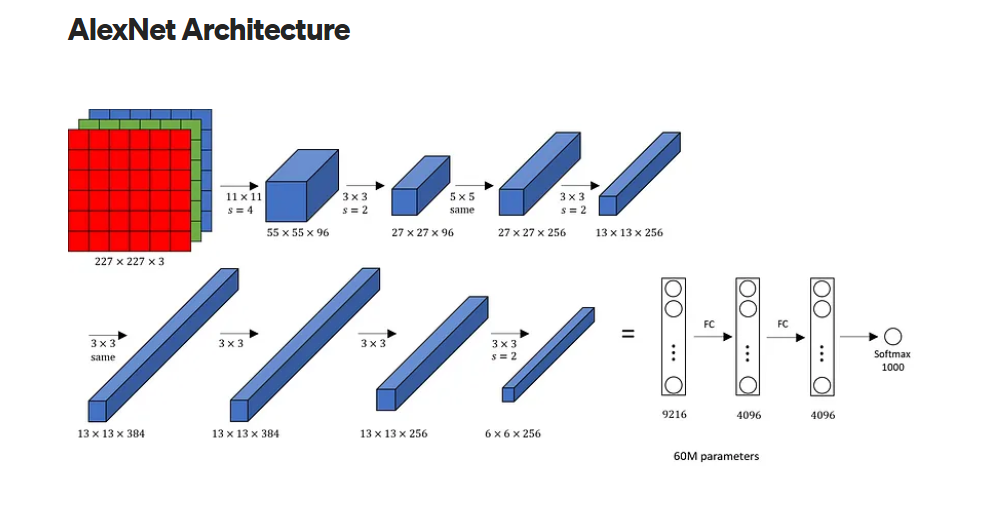

**Building CNN Based On AlexNet Architecture**

In [2]:
# Importing Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
#ALexNet Feature Extraction Blocks from scratch
#let's build the Alex net from scratch
AlexNet_conv_layers = tf.keras.models.Sequential([

    #tf.keras.layers.Input(shape = (227,227,3)),
    #227 * 227 *3 ==>([(227-11)/4] +1) ==> 55 * 55 * 96
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = 'valid' ,activation = 'relu', input_shape =(227,227,3) ),

    # 55 * 55 * 96 ==>([(55-3)/2] +1) ==> 27 * 27 * 96
    tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),

    #Hint:: if padding is 'same' , so p  = 2
    #27 * 27 * 96 ==> ([(27-5 + 2 * 2)] + 1) ==> 27 * 27 * 256
    tf.keras.layers.Conv2D(filters = 256, kernel_size  = (5,5), strides = (1,1), padding  = 'same', activation = 'relu'),

    #27 * 27 * 256 ==> ([(27-3)/2] + 1) ==> 13 * 13 * 256
    tf.keras.layers.MaxPool2D(pool_size = (3,3),strides = (2,2)),

    #Hint:: if padding is 'same' , so p  = 1
    #13 * 13 * 256 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
    tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3),strides= (1,1),padding= 'same'),

    #Hint:: if padding is 'same' , so p  = 1
    #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
    tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'),

    #Hint:: if padding is 'same' , so p  = 1
    #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 256
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), padding  = 'same'),

    #13 * 13 * 256 ==> ([(13-3)/2]+1) ==> 6 * 6 * 256
    tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
    ]
)
AlexNet_conv_layers.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,747,200 (14.29 MB)

 Trainable params: 3,747,200 (14.29 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
AlexNet_conv_layers.trainable_variables

[<KerasVariable shape=(11, 11, 3, 96), dtype=float32, path=sequential/conv2d/kernel>,
 <KerasVariable shape=(96,), dtype=float32, path=sequential/conv2d/bias>,
 <KerasVariable shape=(5, 5, 96, 256), dtype=float32, path=sequential/conv2d_1/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential/conv2d_1/bias>,
 <KerasVariable shape=(3, 3, 256, 384), dtype=float32, path=sequential/conv2d_2/kernel>,
 <KerasVariable shape=(384,), dtype=float32, path=sequential/conv2d_2/bias>,
 <KerasVariable shape=(3, 3, 384, 384), dtype=float32, path=sequential/conv2d_3/kernel>,
 <KerasVariable shape=(384,), dtype=float32, path=sequential/conv2d_3/bias>,
 <KerasVariable shape=(3, 3, 384, 256), dtype=float32, path=sequential/conv2d_4/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential/conv2d_4/bias>]

In [7]:
#build your own classifier:
FC_layers  =  tf.keras.models.Sequential([

    tf.keras.layers.Dense(units = 1024 ,activation = 'relu',input_shape = (9216,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units = 38, activation = 'softmax')
])
FC_layers.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,530,854 (40.17 MB)

 Trainable params: 10,528,806 (40.16 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
# AlexNet_conv_layers.add(tf.keras.layers.Flatten())
# AlexNet_conv_layers.summary()

In [8]:
#function to combine the two architecture
def Alex_classifier(Feature_extractionNet, FCnet):
    AlexNet = tf.keras.Sequential()
    #conv_layers:
    for layer in Feature_extractionNet.layers:
        print(layer)
        AlexNet.add(layer)
    #check the flatten layers is exist
    if not isinstance(layer, tf.keras.layers.Flatten):
        AlexNet.add(tf.keras.layers.Flatten())
    #add FC layers
    for layer in FCnet.layers:
        AlexNet.add(layer)
    return AlexNet

In [9]:
Net = Alex_classifier(AlexNet_conv_layers,FC_layers)

<Conv2D name=conv2d, built=True>
<MaxPooling2D name=max_pooling2d, built=True>
<Conv2D name=conv2d_1, built=True>
<MaxPooling2D name=max_pooling2d_1, built=True>
<Conv2D name=conv2d_2, built=True>
<Conv2D name=conv2d_3, built=True>
<Conv2D name=conv2d_4, built=True>
<MaxPooling2D name=max_pooling2d_2, built=True>


In [10]:
Net.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,278,054 (54.47 MB)

 Trainable params: 14,276,006 (54.46 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
#The above method is good not we get difficulty divide the two architectures(CNN feature extractor + FC layers) after combining
#lets use another approach called fuctional API to combine the two architecture then, try to divide them again
#but why we are interested in dividing the two architecture again? Well, because we're interested to store the weights obtained in two
#spereted files for later usage the user can use CNN feature extractor only , and create his own FC classifer.
#let' work now:

In [11]:
#function to combine the two architecture
def AlexNet_classifier(Feature_extractionNet, FCnet,Image_dim = (227, 227,3)):
    #defuat image dim for Alex_net is (227, 227, 3)
    input_layer = tf.keras.Input(shape = (227,227, 3))
    #pass the input to conv_layers:
    ouputs = Feature_extractionNet(input_layer)

    #check the flatten layers is exist
    #if not isinstance(Feature_extractionNet[-1], tf.keras.layers.Flatten):
        #Feature_extractionNet.add(tf.keras.layers.Flatten())

    ouputs= tf.keras.layers.Flatten()(ouputs)
    #pass the flattened output to FC layers
    ouputs = FCnet(ouputs)
    #return with combined model
    return tf.keras.Model(inputs = input_layer, outputs = ouputs)

In [12]:
alex_net =  AlexNet_classifier(AlexNet_conv_layers,FC_layers)

In [13]:
alex_net.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 6, 6, 256)           │       3,747,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 38)                  │      10,530,854 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,278,054 (54.47 MB)

 Trainable params: 14,276,006 (54.46 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [14]:
#to get access of the conv layers
alex_net.get_layer('sequential').layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>]

In [16]:
#to get access the weights of the specific conv layer
import numpy as np
type( alex_net.get_layer('sequential').layers[2].get_weights() )

list

In [ ]:
#so we can access the blocks of the model
#let's preform another approach!  using the class

In [17]:
#let's perfom AlexConv function: here we will not add any paramters, in the future we can return and update these parameters:
#ALexNet Feature Extraction Blocks from scratch
#let's build the Alex net from scratch
def AlexConv():
    return tf.keras.models.Sequential([

        #tf.keras.layers.Input(shape = (227,227,3)),
        #227 * 227 *3 ==>([(227-11)/4] +1) ==> 55 * 55 * 96
        tf.keras.layers.Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = 'valid' ,activation = 'relu', input_shape =(227,227,3) ),

        # 55 * 55 * 96 ==>([(55-3)/2] +1) ==> 27 * 27 * 96
        tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),

        #Hint:: if padding is 'same' , so p  = 2
        #27 * 27 * 96 ==> ([(27-5 + 2 * 2)] + 1) ==> 27 * 27 * 256
        tf.keras.layers.Conv2D(filters = 256, kernel_size  = (5,5), strides = (1,1), padding  = 'same', activation = 'relu'),

        #27 * 27 * 256 ==> ([(27-3)/2] + 1) ==> 13 * 13 * 256
        tf.keras.layers.MaxPool2D(pool_size = (3,3),strides = (2,2)),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 256 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
        tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3),strides= (1,1),padding= 'same'),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
        tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 256
        tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), padding  = 'same'),

        #13 * 13 * 256 ==> ([(13-3)/2]+1) ==> 6 * 6 * 256
        tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
        ]
)

#let's perfom AlexFC() function: here we will not add any paramters, in the future we can return and update these parameters:
#ALexNet Feature Extraction Blocks from scratch
#let's build the Alex net from scratch
#build your own classifier:
def AlexFC():
    return  tf.keras.models.Sequential([
            tf.keras.layers.Dense(units = 1024 ,activation = 'relu',input_shape = (9216,)),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dense(units = 1024, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(units = 38, activation = 'softmax')
        ])


In [ ]:

outputs = layers.Dense(10)(inputs)
model = MyModel(inputs, outputs)
model.add_loss(ops.sum(outputs))

In [ ]:
model.summary()

In [32]:
class AlexNet(tf.keras.Model):
    def __init__(self, include_top = True, Image_dim = (227,227,3), num_classes = 38):
        super().__init__()
        #Define Conv layers:
        self.conv_layers = AlexConv()
        #Define the fully layers
        self.fc_layers = None
        if include_top:
            self.fc_layers = AlexFC()
        self.include_top = include_top

    def call(self, inputs, return_parts='combined'):
        #it's forward pass operation
        if not self.include_top:
            #the user need only convulation layers
            return self.conv_layers(inputs)
        #here the user need the whole architecture [return_parts='combined']
        return self.fc_layers(tf.keras.layers.Flatten()(self.conv_layers(inputs)))



In [33]:
net = AlexNet(include_top = True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
net.summary()

Model: "alex_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 6, 6, 256)           │       3,747,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 38)                  │      10,530,854 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,278,054 (54.47 MB)

 Trainable params: 14,276,006 (54.46 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [40]:
inputs = tf.keras.layers.Input(shape = (227,227,3))
#inputs = tf.random.normal([1, 227, 227, 3])
net(inputs)


<KerasTensor shape=(None, 38), dtype=float32, sparse=False, name=keras_tensor_211>

In [41]:
net.output

<KerasTensor shape=(None, 38), dtype=float32, sparse=False, name=keras_tensor_207>

In [43]:
#if we need to extract the conv layers only:
AlexNet = AlexNet(include_top = False)
AlexNet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "alex_net_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 6, 6, 256)           │       3,747,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,747,200 (14.29 MB)

 Trainable params: 3,747,200 (14.29 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#so you addd the classifier layers using def AlexNet_classifier(Feature_extractionNet, FCnet,Image_dim = (227, 227,3)) function
#or cutstom , let's do using custom procedure:

inputs = tf.keras.layers.Input(shape = (227,227,3))
#inputs = tf.random.normal([1, 227, 227, 3])
AlexNet(inputs)

#to combine the feature extraction layers with our custom classifiation layers
outputs = AlexNet.output
#our layers:
outputs  = tf.keras.layers.Flatten(name = 'flatten')(outputs)
outputs = tf.keras.layers.Dense(4096 ,activation = 'relu', name = 'fc1')(outputs)
outputs = tf.keras.layers.Dense(1000, activation = 'relu',name = 'fc2')(outputs)
outputs = tf.keras.layers.Dense(2, activation ='softmax',name = 'predicted')(outputs)


In [47]:
AlexNet.input

<KerasTensor shape=(None, 227, 227, 3), dtype=float32, sparse=False, name=keras_tensor_231>

In [48]:
model = tf.keras.Model(inputs = AlexNet.input , outputs = outputs)

In [50]:
AlexNet.layers

[<Sequential name=sequential_12, built=True>]

In [49]:
model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ alex_net_5 (AlexNet)                 │ (None, 6, 6, 256)           │       3,747,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predicted (Dense)                    │ (None, 2)                   │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,599,034 (173.95 MB)

 Trainable params: 45,599,034 (173.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

#transfer learning

for layer in AlexNet.layers: #if the cnn layers is pretrained
  layer.trainable = False

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy']
)